In [ ]:
!pip install neuralforecast

In [15]:
import pandas as pd
import numpy as np
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

# Your data:
years = [2020, 2021, 2022, 2023, 2024, 2025]
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
data = [
    [15.53, 14.69, 11.25, 12.87, 12.88, 13.89, 14.62, 15.46, 15.12, 15.60, 17.64, 19.00],  # 2020
    [19.13, 21.06, 21.18, 26.00, 28.18, 29.08, 29.22, 30.27, 31.93, 34.39, 33.41, 34.42],  # 2021
    [35.21, 33.16, 33.80, 33.69, 33.07, 31.54, 34.13, 35.52, 34.12, 35.37, 36.68, 35.31],  # 2022
    [35.66, 34.89, 35.11, 37.11, 38.82, 41.25, 43.48, 43.16, 44.30, 43.72, 47.18, 50.70],  # 2023
    [55.63, 57.28, 58.47, 61.22, 60.67, 64.98, 69.58, 69.78, 69.37, 65.81, 65.38, 64.24],  # 2024
    [62.22, None, None, None, None, None, None, None, None, None, None, None]             # 2025 (Partial data for January)
]

# Create a DataFrame
df = pd.DataFrame(data, index=years, columns=months)
df = df.stack().reset_index()
df.columns = ['year', 'month', 'value']

# Convert 'year' and 'month' to datetime
df['ds'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%b')
df = df[['ds', 'value']].copy()
df = df.dropna()  # Drop the rows with missing values

# Rename columns to match NeuralForecast requirements
df.columns = ['ds', 'y']

# Add a unique_id column (required by NeuralForecast)
df['unique_id'] = '1'  # Use a constant value since there's only one time series

# Initialize models
models = [
    NBEATS(input_size=24, h=12, max_steps=100),  # Example configuration
    NHITS(input_size=24, h=12, max_steps=100),   # Example configuration
]

# Initialize NeuralForecast
nf = NeuralForecast(models=models, freq='M')

# Fit the models
nf.fit(df)

# Forecast
forecast = nf.predict()
print(forecast)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

                  ds     NBEATS      NHITS
unique_id                                 
1         2025-01-31  61.604733  61.639977
1         2025-02-28  60.784382  61.339973
1         2025-03-31  61.838360  62.388126
1         2025-04-30  60.923271  61.680546
1         2025-05-31  61.333084  61.842628
1         2025-06-30  61.139553  62.813782
1         2025-07-31  66.201057  64.997063
1         2025-08-31  68.272713  67.042725
1         2025-09-30  68.343086  67.538155
1         2025-10-31  70.207649  69.815353
1         2025-11-30  70.856453  71.550827
1         2025-12-31  71.760666  73.456078


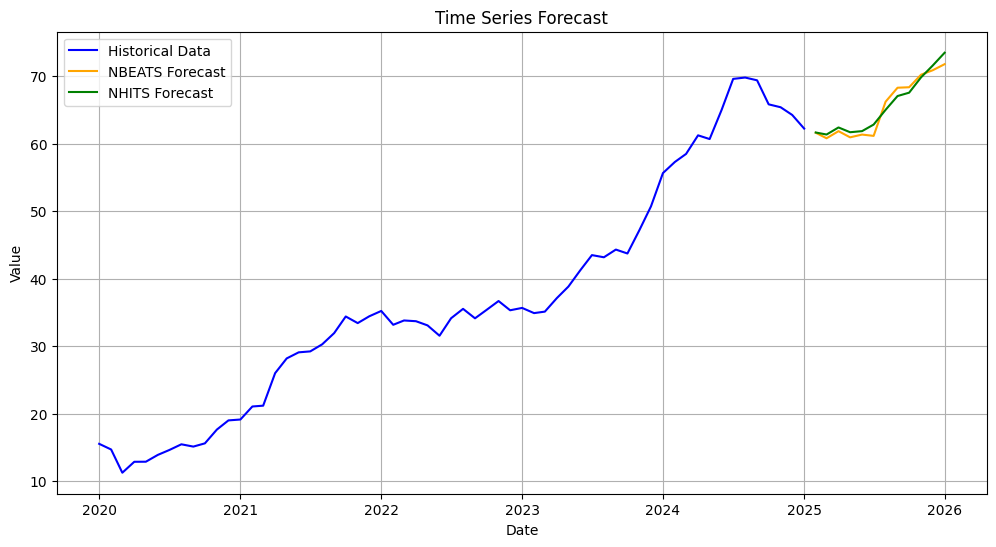

In [19]:
# Plot the forecasts using matplotlib or seaborn
import matplotlib.pyplot as plt

# Assuming your forecast DataFrame is called 'forecast'
dates = forecast['ds']
nbeats_forecast = forecast['NBEATS']
nhits_forecast = forecast['NHITS']


plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')
plt.plot(dates, nbeats_forecast, label='NBEATS Forecast', color='orange')
plt.plot(dates, nhits_forecast, label='NHITS Forecast', color='green')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

                  ds      NBEATS       NHITS
unique_id                                   
1         2025-01-31   63.172688   61.684376
1         2025-02-28   64.909904   62.708729
1         2025-03-31   69.888405   64.806938
1         2025-04-30   70.953278   63.607338
1         2025-05-31   71.438629   64.005409
1         2025-06-30   72.950233   65.006828
1         2025-07-31   71.939148   65.927681
1         2025-08-31   73.551506   67.669212
1         2025-09-30   73.287018   68.208488
1         2025-10-31   73.621033   69.995956
1         2025-11-30   76.757423   73.199745
1         2025-12-31   79.299744   74.796921
1         2026-01-31   83.475418   77.519386
1         2026-02-28   87.793251   81.783424
1         2026-03-31   89.272591   85.636383
1         2026-04-30   88.519264   87.873413
1         2026-05-31   91.136276   93.213615
1         2026-06-30   94.884514   98.749069
1         2026-07-31  100.556473  102.918541
1         2026-08-31  105.405846  107.919388
1         

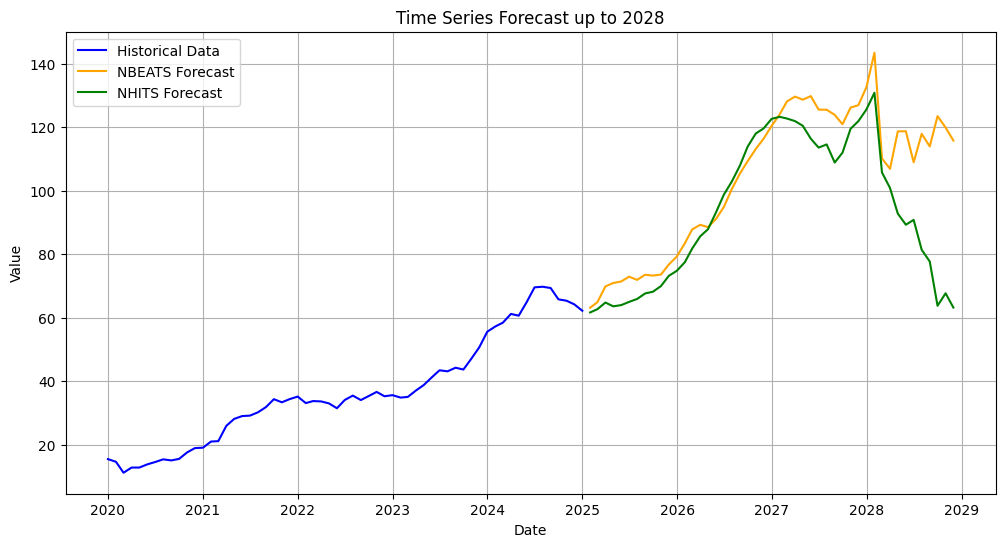

In [21]:
import pandas as pd
import numpy as np
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

# Your data:
# ... (Your data remains the same) ...

# Initialize models with adjusted horizon (h)
# Calculate the horizon (h) for forecasting up to 2028
# Convert the Timedelta to an integer representing the number of months
horizon = int(((pd.to_datetime('2028-12-31') - df['ds'].max()).days) / 30.4375)  # days for an average month

# Initialize models with adjusted horizon (h)
models = [
    NBEATS(input_size=24, h=horizon, max_steps=100),  # Updated horizon
    NHITS(input_size=24, h=horizon, max_steps=100),   # Updated horizon
]
# Initialize NeuralForecast
nf = NeuralForecast(models=models, freq='M')

# Fit the models
nf.fit(df)

# Forecast
forecast = nf.predict()
print(forecast)

# Plot the forecasts using matplotlib or seaborn
import matplotlib.pyplot as plt

# Assuming your forecast DataFrame is called 'forecast'
dates = forecast['ds']
nbeats_forecast = forecast['NBEATS']
nhits_forecast = forecast['NHITS']


plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')
plt.plot(dates, nbeats_forecast, label='NBEATS Forecast', color='orange')
plt.plot(dates, nhits_forecast, label='NHITS Forecast', color='green')
plt.title('Time Series Forecast up to 2028')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()